# Импорты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

# Константы

In [2]:
DATA_PATH = './data/'
OLD_DATA_PATH = './old_data/'

# Вспомогательные функции

In [3]:
def get_describe(data):
    res = data.describe(include='all').T.copy(deep=True)
    med = data.median()
    nul = data.isnull().sum()
    nul_percent = (nul * 100 / len(data)).astype(int)
    typ = data.dtypes
    res.insert(0, 'dtypes', typ)
    res.insert(1, 'nulls', nul)
    res.insert(1, 'nulls_percent', nul_percent)
    res.insert(5, 'median', med)
    
    return res

# Исходные данные

## Путилково

In [4]:
# df_1 = pd.concat(pd.read_excel(DATA_PATH + 'Путилково/Путилково_2_7,_9,_19,_20_дома_с.xlsx', 
#                                sheet_name=None), 
#                  ignore_index=True)
df = pd.read_excel(DATA_PATH + 'Путилково/Путилково_2. Дома с метражом.xlsx')
df.head(1)

,Проект,Номер дома,Номер квартиры,Тип планировки,Тип планировки 2,"Общая площадь, кв,м,",Ссылка на планировку,Комнатность,Тип,Паркинг,...,"Ценазакв,м,","Ценазапомещение,тг.",Статус,Дополнительный статус,Дата старта продаж,Дата продажи,ProfitbaseId,ProfitbaseHomeId,ComplexId,Площадь гардеробных
0,Путилково,7,1,2-46-У-ДС(1.1),NaN,44.2,https://drive.google.com/open?id=1Mi3B3SxvnxMR...,2ккв,квартира,NaN,...,100602.0,4446608.4,Продажа,NaN,NaN,2019-08-29 13:12:32,NaN,NaN,NaN,NaN


In [5]:
print(df['Номер дома'].unique())

[ 7  8  9 17 18 19 20]


In [6]:
df_descr = get_describe(df)

In [7]:
#df_descr.loc[df_descr['dtypes'] != object, ['unique', 'freq', 'top', 'first', 'last']].fillna('', inplace=True)

In [8]:
df_descr

,dtypes,nulls_percent,nulls,count,unique,median,top,freq,first,last,mean,std,min,25%,50%,75%,max
Проект,object,0,0,1466,1,NaN,Путилково,1466,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Номер дома,int64,0,0,1466,NaN,9.00,NaN,NaN,NaT,NaT,11.5075,5.37206,7,7,9,18,20
Номер квартиры,int64,0,0,1466,NaN,152.50,NaN,NaN,NaT,NaT,192.646,144.282,1,72,152.5,307.75,533
Тип планировки,object,24,354,1112,68,NaN,1В1,30,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Тип планировки 2,float64,100,1466,0,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Общая площадь, кв,м,",float64,0,0,1466,NaN,39.70,NaN,NaN,NaT,NaT,44.5256,14.7283,19.7,32.3,39.7,55.225,91.4
Ссылка на планировку,object,24,354,1112,232,NaN,https://drive.google.com/open?id=1OxCvGKibAnhf...,23,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Комнатность,object,0,0,1466,7,NaN,1ккв,518,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Тип,object,0,0,1466,1,NaN,квартира,1466,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Паркинг,float64,100,1466,0,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Предобработка

## Убираем полностью лишние, пустые и константные колонки

In [9]:
cols_to_drop = ['Проект', 'Ссылка на планировку', 'Тип', 'Номер квартиры']
cols_to_drop.extend(df_descr[df_descr['nulls_percent']==100].index)
df.drop(cols_to_drop, axis=1, inplace=True)

## Убираем дома без данных

In [10]:
houses_to_drop = [17, 18, 20]
df = df.loc[~df['Номер дома'].isin(houses_to_drop)].copy(deep=True)

In [11]:
df_descr = get_describe(df)
df_descr.loc[df_descr['nulls_percent']!=0]

,dtypes,nulls_percent,nulls,count,unique,median,top,freq,first,last,mean,std,min,25%,50%,75%,max
Студия,object,10,120,992,2,NaN,нет,798,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Тип санузла 1,object,89,992,120,2,NaN,совмещенный,74,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Размер сан узла №2,float64,87,973,139,NaN,3.90,NaN,NaN,NaT,NaT,2.98849,1.27604,1.1,1.5,3.9,3.9,4.5
Тип санузла 2,object,98,1097,15,1,NaN,совмещенный,15,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Гардеробная,float64,64,713,399,NaN,1.00,NaN,NaN,NaT,NaT,1,0,1,1,1,1,1
Размер балкона №1,float64,6,76,1036,NaN,3.75,NaN,NaN,NaT,NaT,4.41178,1.75777,1.9,3.2,3.75,4.7,9.8
Размер балкона №2,float64,77,865,247,NaN,3.20,NaN,NaN,NaT,NaT,3.84291,1.35494,1.1,3,3.2,3.7,9.6
Размер балкона №3,float64,98,1096,16,NaN,3.60,NaN,NaN,NaT,NaT,3.4375,0.218708,3.2,3.2,3.6,3.6,3.7
Размер 1-й комнаты,float64,1,13,1099,NaN,12.00,NaN,NaN,NaT,NaT,12.2641,1.53144,8.8,11.3,12,13.2,17.4
Размер 2-й комнаты,float64,54,603,509,NaN,12.30,NaN,NaN,NaT,NaT,12.6859,1.94776,8.8,11.9,12.3,13.4,19.7


## Восстановление студий по комнатности

In [12]:
df.loc[df['Студия'].isnull() & df['Комнатность'].str.contains('с'), 'Студия'] = 'да'
df.loc[df['Студия'].isnull(), 'Студия'] = 'нет'

## Санузлы - заполнение пустых значений

In [13]:
df.loc[(df['Количество сан узлов'] == 1), 'Тип санузла 2'] = 'Санузел отсутствует'
df.loc[(df['Количество сан узлов'] == 1), 'Размер сан узла №2'] = 0

In [14]:
df.loc[df['Тип санузла 1'].isnull(), 'Тип санузла 1'] = 'нет данных'
df.loc[df['Тип санузла 2'].isnull(), 'Тип санузла 2'] = 'нет данных'

In [15]:
#sns.boxplot(x='Тип санузла 1', y='Размер сан узла №1', data=df[df['Количество сан узлов']==1], palette="Set1");

In [16]:
# g = df.groupby(['Количество сан узлов', 'Тип санузла 1', 'Тип санузла 2'])\
#                ['Размер сан узла №1', 'Размер сан узла №2']\
#       .apply(lambda x: pd.DataFrame.describe(x)).reset_index(level=3)

# g = g[g['level_3'].isin(['min','max'])]
# g

In [17]:
# sns.jointplot(x="Размер сан узла №1", y="Размер сан узла №2", data=df);

# sns.lmplot(x="Размер сан узла №1", 
#            y="Размер сан узла №2",
#            data=df, 
#            fit_reg=False);

# sns.boxplot(x="Тип санузла 1", y="Размер сан узла №1", hue='Количество сан узлов', data=df, palette="Set1");
# sns.boxplot(x="Тип санузла 1", y="Размер сан узла №1", data=df, palette="Set1");
# sns.boxplot(x="Тип санузла 2", y="Размер сан узла №2", data=df, palette="Set1");
# sns.boxplot(x="Тип санузла 2", y="Размер сан узла №2", hue="Количество сан узлов", data=df, palette="Set1");

## Гардеробные - заполнение пустых значений

In [18]:
df['Гардеробная'].fillna(0, inplace=True)
df['Площадь гардеробных'].fillna(0, inplace=True)

In [19]:
# corr = df[['Номер дома',
#    'Этаж',
#    'Общая площадь, кв,м,',
#  'Секция',
#  'Линия',
#    'Количество балконов',
#  'Размер балкона №1',
#  'Размер балкона №2',
#  'Размер балкона №3']].corr(method='spearman')

In [20]:
# corr['Размер балкона №3'].sort_values(ascending=False)

In [21]:
# sns.boxplot(x='Линия', y="Размер балкона №2", hue='Секция', data=df, palette="Set1");

In [22]:
df_descr = get_describe(df)
df_descr.loc[df_descr['nulls_percent']!=0]

,dtypes,nulls_percent,nulls,count,unique,median,top,freq,first,last,mean,std,min,25%,50%,75%,max
Размер балкона №1,float64,6,76,1036,NaN,3.75,NaN,NaN,NaT,NaT,4.41178,1.75777,1.9,3.2,3.75,4.7,9.8
Размер балкона №2,float64,77,865,247,NaN,3.20,NaN,NaN,NaT,NaT,3.84291,1.35494,1.1,3,3.2,3.7,9.6
Размер балкона №3,float64,98,1096,16,NaN,3.60,NaN,NaN,NaT,NaT,3.4375,0.218708,3.2,3.2,3.6,3.6,3.7
Размер 1-й комнаты,float64,1,13,1099,NaN,12.00,NaN,NaN,NaT,NaT,12.2641,1.53144,8.8,11.3,12,13.2,17.4
Размер 2-й комнаты,float64,54,603,509,NaN,12.30,NaN,NaN,NaT,NaT,12.6859,1.94776,8.8,11.9,12.3,13.4,19.7
Размер 3-й комнаты,float64,89,993,119,NaN,12.00,NaN,NaN,NaT,NaT,13.5723,3.22881,10.1,10.6,12,18,18.1
Размер 4-й комнаты,float64,98,1096,16,NaN,12.00,NaN,NaN,NaT,NaT,12.0437,0.613154,10.6,12,12,12.5,12.5
Дата продажи,datetime64[ns],60,674,438,270,NaN,2019-11-29 00:00:00,10,2018-12-10,2019-12-16 15:25:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Балконы - заполнение пустых размеров

In [23]:
df.loc[df['Размер балкона №1'].isnull(), 'Количество балконов'].value_counts()

0.0    76
Name: Количество балконов, dtype: int64

In [24]:
df['Размер балкона №1'].fillna(0, inplace=True)

In [25]:
df.loc[df['Размер балкона №2'].isnull(), 'Количество балконов'].value_counts()

1.0    789
0.0     76
Name: Количество балконов, dtype: int64

In [26]:
df['Размер балкона №2'].fillna(0, inplace=True)

In [27]:
df.loc[df['Размер балкона №3'].isnull(), 'Количество балконов'].value_counts()

1.0    789
2.0    230
0.0     76
3.0      1
Name: Количество балконов, dtype: int64

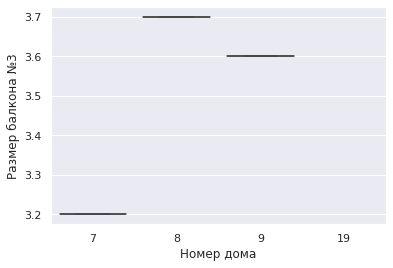

In [28]:
sns.boxplot(x='Номер дома', y="Размер балкона №3", hue=None, data=df, palette="Set1");

In [29]:
df.loc[(df['Количество балконов']==3) & (df['Размер балкона №3'].isnull()), 'Номер дома']

711    9
Name: Номер дома, dtype: int64

In [30]:
df['Размер балкона №3'].fillna(3.6, inplace=True)

In [31]:
df_descr = get_describe(df)
df_descr.loc[df_descr['nulls_percent']!=0]

,dtypes,nulls_percent,nulls,count,unique,median,top,freq,first,last,mean,std,min,25%,50%,75%,max
Размер 1-й комнаты,float64,1,13,1099,NaN,12.0,NaN,NaN,NaT,NaT,12.2641,1.53144,8.8,11.3,12,13.2,17.4
Размер 2-й комнаты,float64,54,603,509,NaN,12.3,NaN,NaN,NaT,NaT,12.6859,1.94776,8.8,11.9,12.3,13.4,19.7
Размер 3-й комнаты,float64,89,993,119,NaN,12.0,NaN,NaN,NaT,NaT,13.5723,3.22881,10.1,10.6,12,18,18.1
Размер 4-й комнаты,float64,98,1096,16,NaN,12.0,NaN,NaN,NaT,NaT,12.0437,0.613154,10.6,12,12,12.5,12.5
Дата продажи,datetime64[ns],60,674,438,270,NaN,2019-11-29 00:00:00,10,2018-12-10,2019-12-16 15:25:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Размеры комнат - заполнение пустых значений

In [32]:
df.loc[df['Размер 1-й комнаты'].isnull(), 'Размер 1-й комнаты'] = \
df.loc[df['Размер 1-й комнаты'].isnull(), 'Жилая площадь за кв,м,']

In [33]:
df.loc[df['Размер 2-й комнаты'].isnull(), 'Комнатность'].value_counts(dropna=False)

1ккв       466
1ккв(с)    137
Name: Комнатность, dtype: int64

In [34]:
df['Размер 2-й комнаты'].fillna(0, inplace=True)

In [35]:
df.loc[df['Размер 3-й комнаты'].isnull(), 'Комнатность'].value_counts(dropna=False)

1ккв       466
2ккв       321
1ккв(с)    137
2ккв(с)     69
Name: Комнатность, dtype: int64

In [36]:
df['Размер 3-й комнаты'].fillna(0, inplace=True)

In [37]:
df.loc[df['Размер 4-й комнаты'].isnull(), 'Комнатность'].value_counts(dropna=False)

1ккв       466
2ккв       321
1ккв(с)    137
3ккв        79
2ккв(с)     69
3ккв(с)     24
Name: Комнатность, dtype: int64

In [38]:
df['Размер 4-й комнаты'].fillna(0, inplace=True)

In [39]:
df_descr = get_describe(df)
df_descr.loc[df_descr['nulls_percent']!=0]

,dtypes,nulls_percent,nulls,count,unique,median,top,freq,first,last,mean,std,min,25%,50%,75%,max
Дата продажи,datetime64[ns],60,674,438,270,NaN,2019-11-29 00:00:00,10,2018-12-10,2019-12-16 15:25:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Дата продажи - заполнение пустых значений

In [40]:
df['Дата продажи'].fillna(df['Дата продажи'].max(), inplace=True)

## Месяц и год продажи

In [41]:
df['Месяц продажи'] = pd.to_datetime(df['Дата продажи']).dt.month
df['Год продажи'] = pd.to_datetime(df['Дата продажи']).dt.year
df.drop('Дата продажи', axis=1, inplace=True)

## Планировки - делим на 2 колонки

In [42]:
def plan(x):
#     print(x)
    if type(x) is str:
        if len(x) <= 3:
            if len(x) == 2:
                return x[1], '0'
            else:
                return x[1], x[2]
        else:
            tmp = x.split('-')
            return tmp[-2], tmp[-1].split('(')[0]
    
    elif math.isnan(x):
        return 'None', 'None'

In [43]:
df['планировка_1'], df['планировка_2'] = zip(*df['Тип планировки'].apply(plan))
df.drop('Тип планировки', axis=1, inplace=True)

## Студия - замена значений на цифры

In [44]:
df['Студия'] = df['Студия'].replace({'да': 1, 'нет': 0})

In [45]:
df_descr = get_describe(df)
df_descr

,dtypes,nulls_percent,nulls,count,unique,median,top,freq,mean,std,min,25%,50%,75%,max
Номер дома,int64,0,0,1112,NaN,8.000,NaN,NaN,9.11151,3.71561,7,7,8,9,19
"Общая площадь, кв,м,",float64,0,0,1112,NaN,39.100,NaN,NaN,43.8674,14.7248,19.7,32.5,39.1,54.4,91.4
Комнатность,object,0,0,1112,7,NaN,1ккв,466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Этаж,int64,0,0,1112,NaN,11.000,NaN,NaN,11.9065,6.56054,2,6,11,17,25
Секция,int64,0,0,1112,NaN,3.000,NaN,NaN,2.67446,1.22241,1,2,3,4,5
Линия,int64,0,0,1112,NaN,3.000,NaN,NaN,2.93885,1.38262,1,2,3,4,5
Студия,int64,0,0,1112,NaN,0.000,NaN,NaN,0.206835,0.405218,0,0,0,0,1
Количество сан узлов,float64,0,0,1112,NaN,1.000,NaN,NaN,1.125,0.330868,1,1,1,1,2
Размер сан узла №1,float64,0,0,1112,NaN,3.900,NaN,NaN,3.76052,0.783572,1.1,3.6,3.9,4.3,4.8
Тип санузла 1,object,0,0,1112,3,NaN,нет данных,992,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Генерация фичей

### One-hot encoding

In [46]:
df.to_csv('dataset.csv', index=False, sep=';')

In [47]:
to_dum = df_descr.loc[df_descr['dtypes'] == object].index
dummies = pd.get_dummies(df[to_dum])
df = pd.concat([df.drop(to_dum, axis=1), dummies], axis=1)

### Проверка корреляций

In [48]:
TARGET_COL = 'Ценазапомещение,тг.'

In [49]:
df.corr(method='spearman')[TARGET_COL].sort_values(ascending=False).head(20)

Ценазапомещение,тг.         1.000000
Общая площадь, кв,м,        0.951894
Жилая площадь за кв,м,      0.865858
Размер коридора             0.795429
Размер 2-й комнаты          0.783605
Кухня                       0.627954
Размер 3-й комнаты          0.533863
Размер балкона №2           0.529943
Комнатность_2ккв            0.514966
Количество балконов         0.486896
Количество сан узлов        0.462204
Размер сан узла №2          0.456359
Тип санузла 2_нет данных    0.449218
Комнатность_3ккв            0.418745
планировка_1_Р              0.386723
Размер сан узла №1          0.369652
планировка_2_ДН             0.324729
планировка_2_ПД             0.266109
планировка_1_У              0.263591
планировка_2_СД             0.246776
Name: Ценазапомещение,тг., dtype: float64

### Функция фильтрации по IQR

In [50]:
def filter_iqr(df, TARGET_COL, min_q=0.25, max_q=0.75):
    sns.boxplot(df[TARGET_COL]);
    plt.show()

    Q1 = df[TARGET_COL].quantile(min_q)
    Q3 = df[TARGET_COL].quantile(max_q)
    IQR = Q3 - Q1

    idx = (df[TARGET_COL] < (Q1 - 1.5 * IQR)) | (df[TARGET_COL] > (Q3 + 1.5 * IQR))

    sns.boxplot(df.loc[~idx, TARGET_COL]);
    plt.show()
    
    return df.loc[~idx].copy(deep=True)

# Прогнозирование цены

## Импорты

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, make_scorer

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, LinearRegression, Ridge

In [52]:
from tqdm import tqdm_notebook

In [53]:
tqdm_notebook().pandas()

/home/rprilepskiy/anaconda3/lib/python3.7/site-packages/tqdm/std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [54]:
RND_STATE = 17


In [55]:
def calc_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))#.astype(float)

In [56]:
def calc_mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

In [57]:
def get_split(df, TARGET_COL, SPLIT=0.2):
    X = df.drop(TARGET_COL, axis=1)
    y = df[TARGET_COL]
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=SPLIT, 
                                                        shuffle=True, 
#                                                         stratify=X['Номер дома'],
                                                        random_state=2019)
    return X_train, X_test, y_train, y_test

In [58]:
mape_scorer = make_scorer(calc_mape, greater_is_better=False)

In [59]:
def calc_cross_val_score(model, X_train, y_train, CV_NUM=5):
    model_name = model.__class__.__name__
    print(model_name)
    c = cross_val_score(model, X_train, y_train, cv=CV_NUM, n_jobs=-1, scoring='neg_mean_squared_error', verbose=0)
    c1 = cross_val_score(model, X_train, y_train, cv=CV_NUM, n_jobs=-1, scoring=mape_scorer, verbose=0)
    return {'model': model_name, 
            'rmse_train': np.mean(np.sqrt(c * (-1))), 
            'mape_train (%)': np.mean(c1 * (-1))}

In [60]:
def select_cv_best_model(X_train, y_train, CV_NUM):
    clf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=RND_STATE)
    regr = AdaBoostRegressor(random_state=RND_STATE, n_estimators=100, learning_rate=0.01)
    tree = ExtraTreesRegressor(n_estimators=100, random_state=RND_STATE, n_jobs=-1)
    gbr = GradientBoostingRegressor(n_estimators=100, random_state=RND_STATE)
    lasso = Lasso(random_state=RND_STATE)
    linreg = LinearRegression(n_jobs=-1)
    ridge = Ridge(random_state=RND_STATE)    

    models = [clf, regr, tree, gbr, lasso, linreg, ridge]

    models_dict = {}
    results = []
    for m in tqdm_notebook(models):
        models_dict[m.__class__.__name__] = m
        try:
            results.append(calc_cross_val_score(m, X_train, y_train, CV_NUM))
        except:
            print('Ошибка с моделью {}'.format(m.__class__.__name__))
            continue

    results = pd.DataFrame.from_records(results).sort_values(by='rmse_train')

    selected_models = results.head(5)['model'].values

    return models_dict, selected_models, results

In [61]:
def train_final_model(X_train, X_test, y_train, y_test, models_dict, selected_models):
    final_models_dict = []
    final_models = {}

    for f in tqdm_notebook(selected_models):
        print(f)
        reg = models_dict[f]
        reg.fit(X_train, y_train)
        y_pred = reg.predict(X_test)
        rmse = calc_rmse(y_test, y_pred)
        mape = calc_mape(y_test, y_pred)
        final_models[f] = reg
        final_models_dict.append({'model': f, 'rmse_valid': rmse, 'mape_valid (%)': mape})

    final_model_results = pd.DataFrame.from_records(final_models_dict).sort_values(by='rmse_valid')

    return final_model_results, final_models

In [62]:
def train_model(df, TARGET_COL, SPLIT, NEED_FILTER_IQR, NEED_DROP_PRICE_PER_SQM, PRICE_PER_SQM_COL, CV_NUM):
    if NEED_FILTER_IQR:
        df = filter_iqr(df, TARGET_COL)
    if NEED_DROP_PRICE_PER_SQM:
        df = df.drop(PRICE_PER_SQM_COL, axis=1).copy(deep=True)

    X_train, X_test, y_train, y_test = get_split(df, TARGET_COL, SPLIT)
    models_dict, selected_models, results = select_cv_best_model(X_train, y_train, CV_NUM)
    final_model_results, final_models = train_final_model(X_train, X_test, y_train,
                                                          y_test, models_dict,
                                                          selected_models)
    return results, final_model_results, final_models

In [63]:
# NEED_FILTER_IQR = True
# SPLIT = 0.3
# CV_NUM = 3
# NEED_DROP_PRICE_PER_SQM = True
# PRICE_PER_SQM_COL = 'Ценазакв,м,'

In [64]:
# results, final_model_results, final_models = train_model(df, TARGET_COL, SPLIT, 
#                                                          NEED_FILTER_IQR, 
#                                                          NEED_DROP_PRICE_PER_SQM, 
#                                                          PRICE_PER_SQM_COL, 
#                                                          CV_NUM
#                                                         )

In [65]:
list_NEED_FILTER_IQR = [True, False]
list_SPLIT = [0.2, 0.3]#[0.1, 0.2, 0.3]
list_CV_NUM = [3, 5]#, 4, 5]
list_NEED_DROP_PRICE_PER_SQM = [True]#, False]
PRICE_PER_SQM_COL = 'Ценазакв,м,'

In [66]:
search = pd.DataFrame()

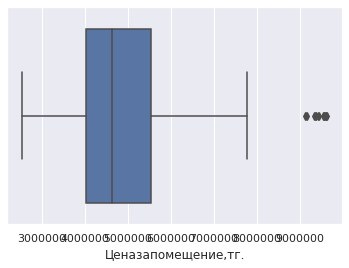

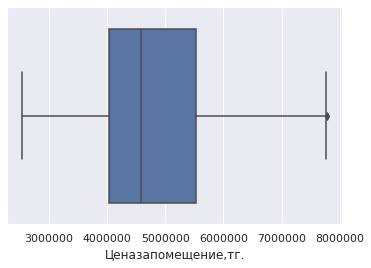

RandomForestRegressor
AdaBoostRegressor
ExtraTreesRegressor
GradientBoostingRegressor
Lasso
LinearRegression
Ridge



Lasso
GradientBoostingRegressor


/home/rprilepskiy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4554809215649.559, tolerance: 117979437668.36638
  positive)


ExtraTreesRegressor
LinearRegression
Ridge



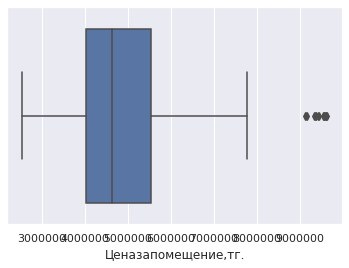

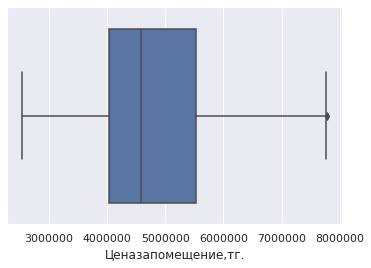

RandomForestRegressor
AdaBoostRegressor
ExtraTreesRegressor
GradientBoostingRegressor
Lasso
LinearRegression
Ridge



GradientBoostingRegressor
ExtraTreesRegressor
Lasso
LinearRegression
RandomForestRegressor


/home/rprilepskiy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4554809215649.559, tolerance: 117979437668.36638
  positive)


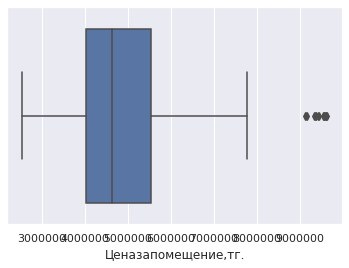

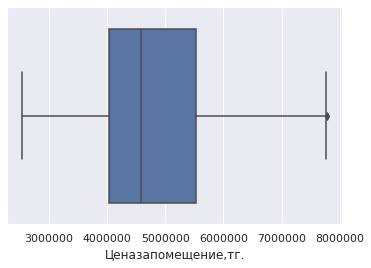

RandomForestRegressor
AdaBoostRegressor
ExtraTreesRegressor
GradientBoostingRegressor
Lasso
LinearRegression
Ridge



ExtraTreesRegressor
GradientBoostingRegressor
Lasso
LinearRegression
RandomForestRegressor


/home/rprilepskiy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3712296157880.3584, tolerance: 101781129053.15213
  positive)


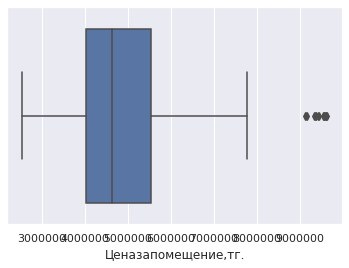

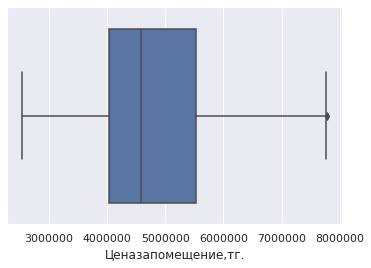

RandomForestRegressor
AdaBoostRegressor
ExtraTreesRegressor
GradientBoostingRegressor
Lasso
LinearRegression
Ridge



ExtraTreesRegressor
GradientBoostingRegressor
RandomForestRegressor
Lasso
LinearRegression



/home/rprilepskiy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3712296157880.3584, tolerance: 101781129053.15213
  positive)


RandomForestRegressor
AdaBoostRegressor
ExtraTreesRegressor
GradientBoostingRegressor
Lasso
LinearRegression
Ridge



ExtraTreesRegressor
Lasso
RandomForestRegressor


/home/rprilepskiy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4711511985584.216, tolerance: 147274528636.58527
  positive)


Ridge
GradientBoostingRegressor



RandomForestRegressor
AdaBoostRegressor
ExtraTreesRegressor
GradientBoostingRegressor
Lasso
LinearRegression
Ridge



ExtraTreesRegressor
Lasso
RandomForestRegressor


/home/rprilepskiy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4711511985584.216, tolerance: 147274528636.58527
  positive)


GradientBoostingRegressor
Ridge



RandomForestRegressor
AdaBoostRegressor
ExtraTreesRegressor
GradientBoostingRegressor
Lasso
LinearRegression
Ridge



ExtraTreesRegressor
Lasso
GradientBoostingRegressor


/home/rprilepskiy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4187763040133.64, tolerance: 124710222593.85318
  positive)


Ridge
RandomForestRegressor



RandomForestRegressor
AdaBoostRegressor
ExtraTreesRegressor
GradientBoostingRegressor
Lasso
LinearRegression
Ridge



ExtraTreesRegressor
Lasso
GradientBoostingRegressor


/home/rprilepskiy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4187763040133.64, tolerance: 124710222593.85318
  positive)


RandomForestRegressor
Ridge




In [67]:
for NEED_FILTER_IQR in tqdm_notebook(list_NEED_FILTER_IQR):
    for SPLIT in list_SPLIT:
        for CV_NUM in list_CV_NUM:
            for NEED_DROP_PRICE_PER_SQM in list_NEED_DROP_PRICE_PER_SQM:
                results, final_model_results, final_models = train_model(df, 
                                                                         TARGET_COL, 
                                                                         SPLIT, 
                                                                         NEED_FILTER_IQR, 
                                                                         NEED_DROP_PRICE_PER_SQM, 
                                                                         PRICE_PER_SQM_COL, 
                                                                         CV_NUM
                                                                        )

                #results
                #final_model_results

                all_results = pd.concat([results.head().reset_index(drop=True), 
                                         final_model_results.iloc[:, 1:]], axis=1).reset_index(drop=True)
                all_results = all_results[np.r_[['model'], sorted(list(all_results)[1:])]].copy(deep=True)
                all_results['NEED_FILTER_IQR'] = NEED_FILTER_IQR
                all_results['SPLIT'] = SPLIT
                all_results['CV_NUM'] = CV_NUM
                all_results['NEED_DROP_PRICE_PER_SQM'] = NEED_DROP_PRICE_PER_SQM

                search = pd.concat([search, all_results], axis=0, ignore_index=True)

In [68]:
search['train_valid_diff_mape'] = np.abs((search['mape_train (%)'] - search['mape_valid (%)']) / search['mape_train (%)'])

In [69]:
search['train_valid_diff_rmse'] = np.abs((search['rmse_train'] - search['rmse_valid']) / search['rmse_train'])

In [70]:
search.sort_values(by=['mape_valid (%)','train_valid_diff_rmse']).head(30)

,model,mape_train (%),mape_valid (%),rmse_train,rmse_valid,NEED_FILTER_IQR,SPLIT,CV_NUM,NEED_DROP_PRICE_PER_SQM,train_valid_diff
6,ExtraTreesRegressor,1.026000,0.67,102811.772215,62265.562584,True,0.2,5,True,0.394373
2,ExtraTreesRegressor,1.110000,0.67,112007.131146,62265.562584,True,0.2,3,True,0.444093
35,ExtraTreesRegressor,1.028000,0.72,97664.222515,77226.696513,False,0.3,5,True,0.209263
30,ExtraTreesRegressor,1.143333,0.72,106709.281967,77226.696513,False,0.3,3,True,0.276289
25,ExtraTreesRegressor,0.918000,0.83,92372.590877,91489.234535,False,0.2,5,True,0.009563
20,ExtraTreesRegressor,1.083333,0.83,110053.148106,91489.234535,False,0.2,3,True,0.168681
15,ExtraTreesRegressor,0.952000,0.85,90535.275698,86837.231836,True,0.3,5,True,0.040846
10,ExtraTreesRegressor,1.050000,0.85,92398.631654,86837.231836,True,0.3,3,True,0.060189
38,RandomForestRegressor,1.340000,0.87,120177.766921,74478.426050,False,0.3,5,True,0.380265
34,RandomForestRegressor,1.493333,0.87,126076.476314,74478.426050,False,0.3,3,True,0.409260


In [71]:
NEED_FILTER_IQR = True
SPLIT = 0.2
CV_NUM = 5
NEED_DROP_PRICE_PER_SQM = True
PRICE_PER_SQM_COL = 'Ценазакв,м,'

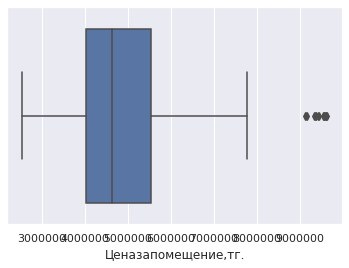

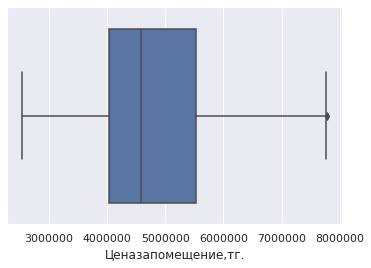

RandomForestRegressor
AdaBoostRegressor
ExtraTreesRegressor
GradientBoostingRegressor
Lasso
LinearRegression
Ridge



GradientBoostingRegressor
ExtraTreesRegressor
Lasso
LinearRegression
RandomForestRegressor


/home/rprilepskiy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4554809215649.559, tolerance: 117979437668.36638
  positive)


In [72]:
results, final_model_results, final_models = train_model(df, TARGET_COL, SPLIT, 
                                                         NEED_FILTER_IQR, 
                                                         NEED_DROP_PRICE_PER_SQM, 
                                                         PRICE_PER_SQM_COL, 
                                                         CV_NUM
                                                        )

Лучшая модель: ExtraTreesRegressor


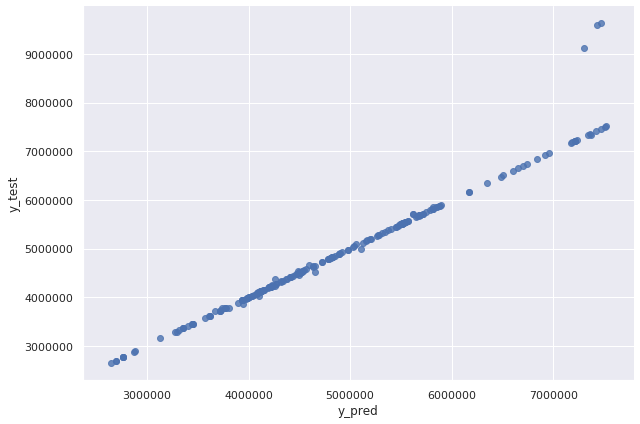

In [73]:
best_model = all_results.loc[0]['model']

X_train, X_test, y_train, y_test = get_split(df.drop(PRICE_PER_SQM_COL, axis=1), TARGET_COL, SPLIT)
print('Лучшая модель: {}'.format(best_model))
clf = final_models[best_model]
y_pred = clf.predict(X_test)
show = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
sns.lmplot('y_pred', 'y_test', show, fit_reg=False, height=6, aspect=1.5);

In [74]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [75]:
pca = PCA(n_components=3)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop([TARGET_COL, PRICE_PER_SQM_COL], axis=1))
pca.fit(X_scaled)
pca.explained_variance_ratio_

array([0.1415919 , 0.0752333 , 0.06115508])

In [76]:
pca = PCA(n_components=3)
pca.fit(df.drop([TARGET_COL, PRICE_PER_SQM_COL], axis=1))
pca.explained_variance_ratio_

array([0.75253425, 0.09866753, 0.04209448])

## Важность признаков

### Таблица explain_weights

In [77]:
import eli5
eli5.explain_weights(clf, feature_names = list(X_train))

Using TensorFlow backend.


Weight,Feature
0.2574 ± 0.5728,Размер 2-й комнаты
0.2249 ± 0.5578,"Общая площадь, кв,м,"
0.1827 ± 0.5261,"Жилая площадь за кв,м,"
0.0757 ± 0.2087,Размер 3-й комнаты
0.0354 ± 0.0792,Комнатность_1ккв(с)
0.0333 ± 0.2415,Размер коридора
0.0328 ± 0.1391,Комнатность_2ккв
0.0267 ± 0.0624,Комнатность_1ккв
0.0243 ± 0.0167,Номер дома
0.0172 ± 0.0060,Месяц продажи


### Гистограмма

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


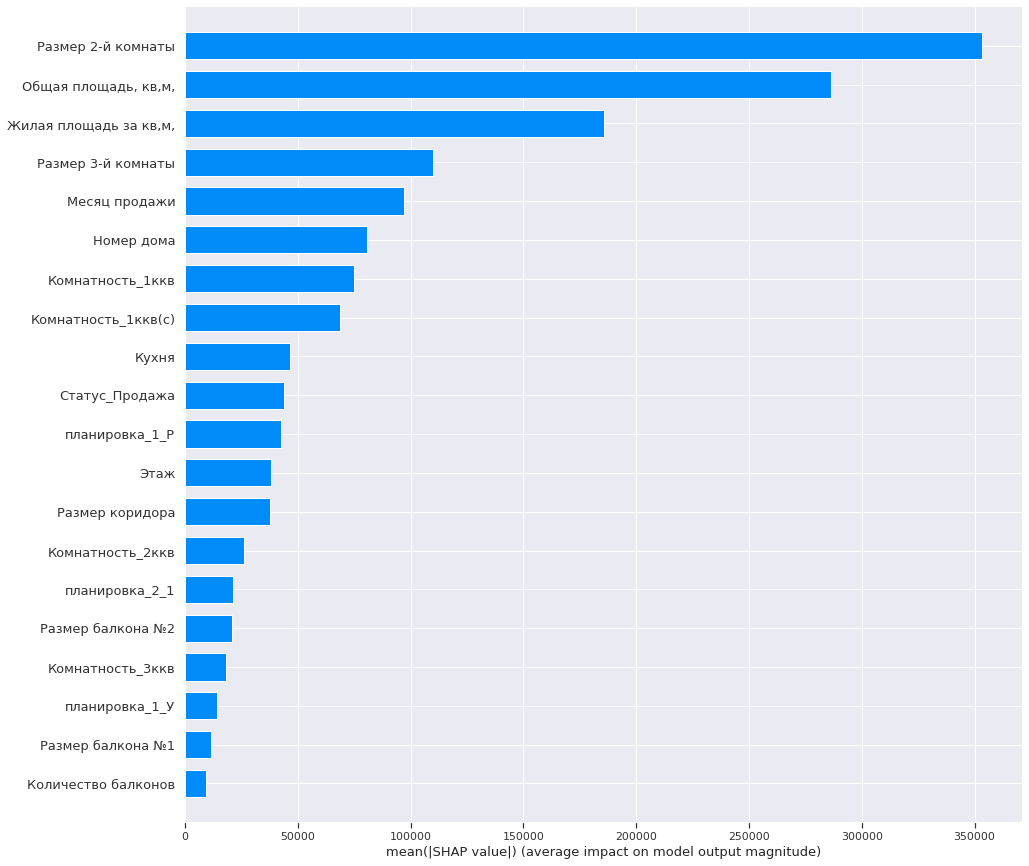

In [78]:
import shap
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_size=(15, 15), plot_type='bar')

### Разноцветная violion

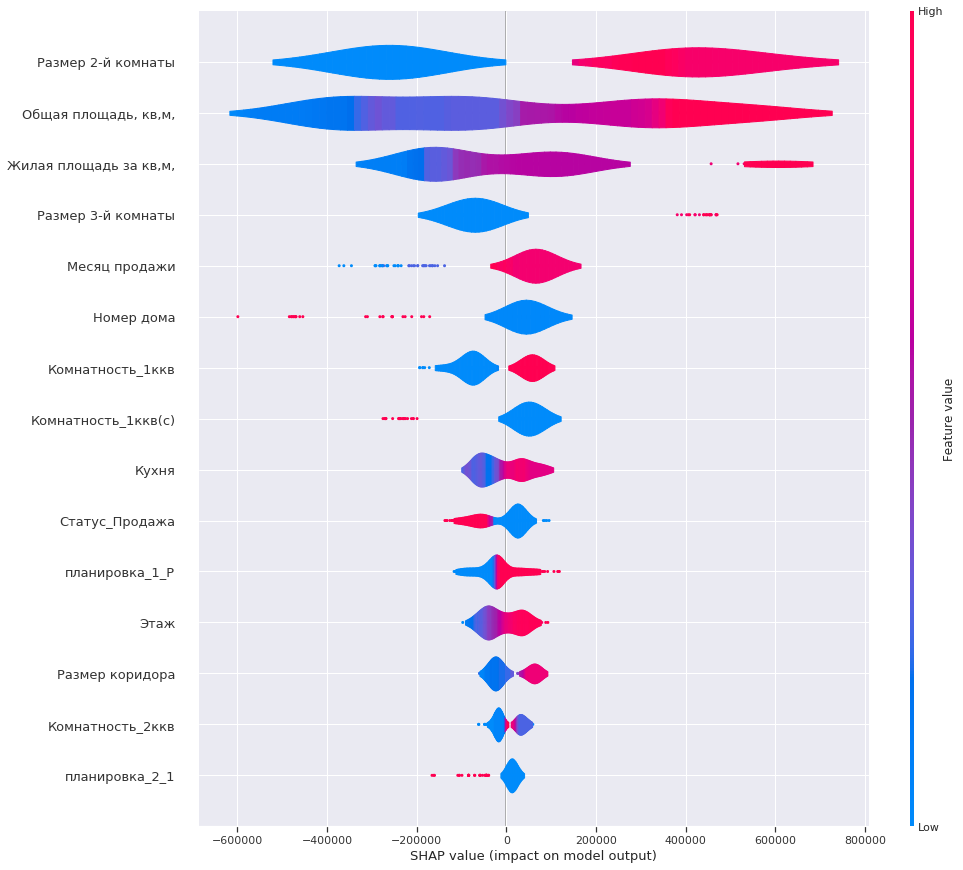

In [79]:
shap.summary_plot(shap_values, X_test[:1000], plot_size=(15, 15), plot_type='violin', max_display=15)

### Разноцветная dots

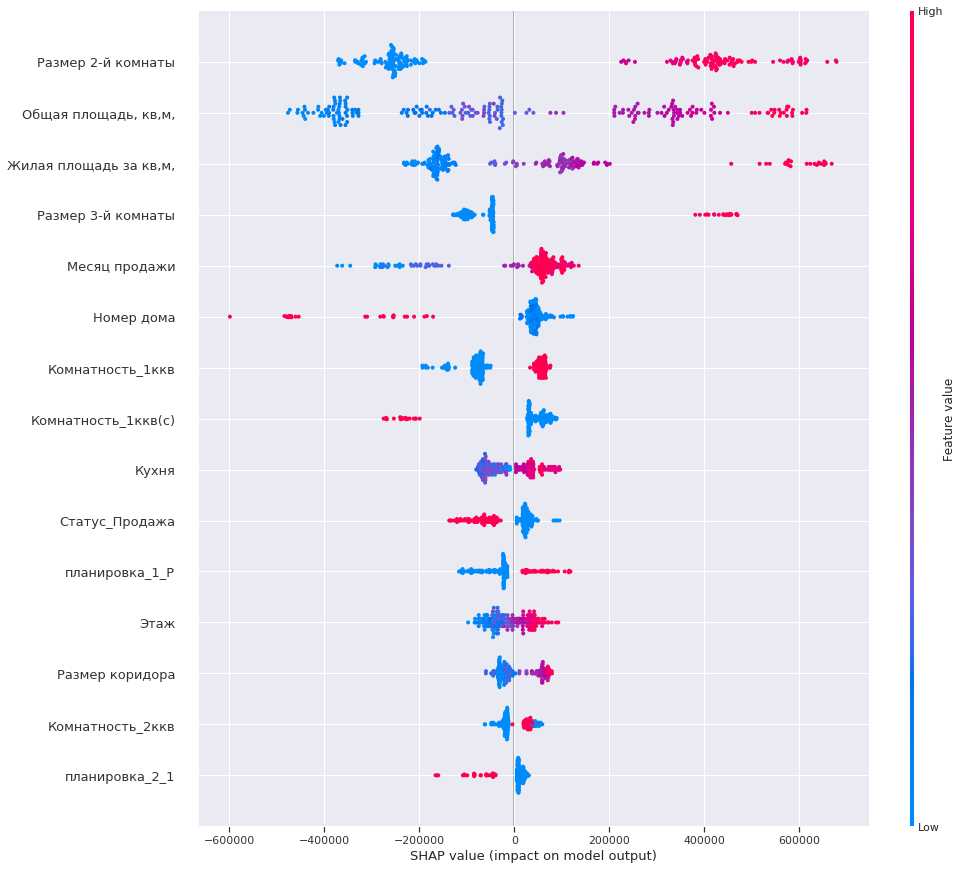

In [80]:
shap.summary_plot(shap_values, X_test[:1000], plot_size=(15, 15), plot_type='dot', max_display=15)

In [81]:
df.corr(method='spearman')[TARGET_COL].sort_values(ascending=False).head(20)

Ценазапомещение,тг.         1.000000
Общая площадь, кв,м,        0.951894
Жилая площадь за кв,м,      0.865858
Размер коридора             0.795429
Размер 2-й комнаты          0.783605
Кухня                       0.627954
Размер 3-й комнаты          0.533863
Размер балкона №2           0.529943
Комнатность_2ккв            0.514966
Количество балконов         0.486896
Количество сан узлов        0.462204
Размер сан узла №2          0.456359
Тип санузла 2_нет данных    0.449218
Комнатность_3ккв            0.418745
планировка_1_Р              0.386723
Размер сан узла №1          0.369652
планировка_2_ДН             0.324729
планировка_2_ПД             0.266109
планировка_1_У              0.263591
планировка_2_СД             0.246776
Name: Ценазапомещение,тг., dtype: float64

In [82]:
df.corr(method='spearman')[TARGET_COL].sort_values(ascending=False).tail(20)

Статус_Стр. Резерв                  -0.018544
планировка_2_НС                     -0.019247
планировка_2_0                      -0.051822
планировка_1_Г                      -0.054841
Статус_Продажа                      -0.069452
Размер балкона №3                   -0.084686
планировка_2_1                      -0.117886
Секция                              -0.129623
планировка_2_2                      -0.153822
планировка_1_В                      -0.191099
планировка_2_Н                      -0.238705
Тип санузла 1_совмещенный           -0.250335
планировка_1_Б                      -0.278032
планировка_2_Д                      -0.305177
Студия                              -0.339374
Ценазакв,м,                         -0.434544
планировка_1_Л                      -0.461454
Комнатность_1ккв                    -0.462159
Тип санузла 2_Санузел отсутствует   -0.462204
Комнатность_1ккв(с)                 -0.541528
Name: Ценазапомещение,тг., dtype: float64